# 1. Uso básico de GPyOpt

In [115]:
import GPy
import GPyOpt
import numpy as np
from numpy.random import seed
import matplotlib.pyplot as plt

# 1. Implementación en una dimensión

In [132]:
# Define the function 
def fpol(x):
#     f = np.poly1d([1, -2, -28, 28, 12, -26, 100])
    SineLowFreq = np.sin(x * 0.01 * np.pi)
    SineMedFreq = 0.25 * np.sin(x * 0.01 * np.pi * 4.9)
    SineHighFreq = 0.15 * np.sin(x * 0.01 * np.pi * 12.1)
#    f = SineLowFreq + SineMedFreq + SineHighFreq;
    f = SineLowFreq - SineMedFreq + 0.00001*x**2
#     f = SineLowFreq
    # Return the value of the polynomial
    return f 

Minimum of -0.9429 occurs at 134.6885


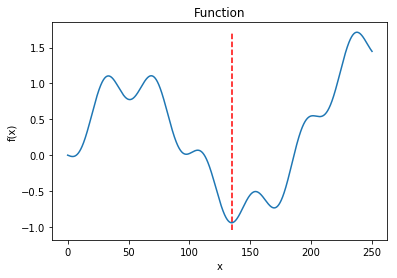

In [133]:
# Plot the function

# Space over which to evluate the function is -5 to 6
xmin=0
xmax=250
x = np.linspace(xmin,xmax, 10000)
y = fpol(x)

miny = min(y)
minx = x[np.argmin(y)]

# Visualize the function
#plt.figure(figsize = (8, 6))
#plt.style.use('fivethirtyeight')
plt.title('Function'); 
plt.xlabel('x'); 
plt.ylabel('f(x)')
plt.vlines(minx, min(y)- 0.1, max(y), linestyles = '--', colors = 'r')
plt.plot(x, y);

# Print out the minimum of the function and value
print('Minimum of %0.4f occurs at %0.4f' % (miny, minx))

In [134]:
def plot_gp(x,y):
    x_grid=np.loadtxt("xgrid")
    m=np.loadtxt("mean")
    m_plus=np.loadtxt("mean_plus")
    m_less=np.loadtxt("mean_less")
    Xdata=np.loadtxt("Xdata")
    Ydata=np.loadtxt("Ydata")
    acqu=np.loadtxt("acquisition")
    xline=np.loadtxt("xline")
    top=4
    bottom=-3.5
    fig = plt.figure(figsize=(10,7))
    ax = plt.subplot(111)
    plt.plot(x, y,'k--',lw=1,alpha = 0.4)
    plt.plot(x_grid,m, 'b-',lw=2, alpha=0.3,label='Media')
    ax.fill_between(x_grid, m_plus, m_less, alpha=0.2,label='Densidad')
    plt.plot(Xdata, Ydata, 'r.', markersize=10)
    plt.plot(x_grid,acqu, 'r-',lw=2,label ='Adquisición')
    plt.axvline(x=xline,color='r')
    plt.ylim(bottom, top)
    plt.xlabel('x',fontsize=14)
    plt.ylabel('f(x)',fontsize=14)
    plt.legend(loc='upper left',fontsize=14)
    ax.tick_params(direction='out',labelsize=14)
    plt.show()

In [135]:
# Define the function's bounds
bounds1D = [{'name': 'x', 'type': 'continuous', 'domain': (xmin,xmax)}]  # problem constraints 

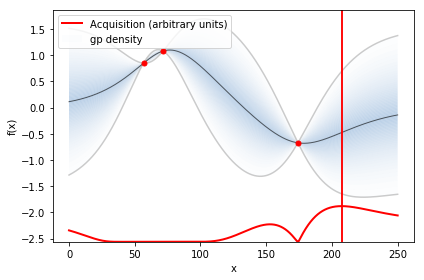

In [136]:
# Creates GPyOpt object with the model and anquisition fucntion
seed(123)
initer=3
myBopt=GPyOpt.methods.BayesianOptimization(f=fpol,            # function to optimize       
                                             domain=bounds1D,         # box-constraints of the problem
                                             initial_design_numdata=initer,
                                             acquisition_type='EI', # exploration/exploitation trade off
                                             normalize_Y=False,
                                             exact_feval = True)    # Selects the Expected improvement
# Run the optimization
max_iter=0     # evaluation budget
myBopt.run_optimization(max_iter)
myBopt.plot_acquisition()

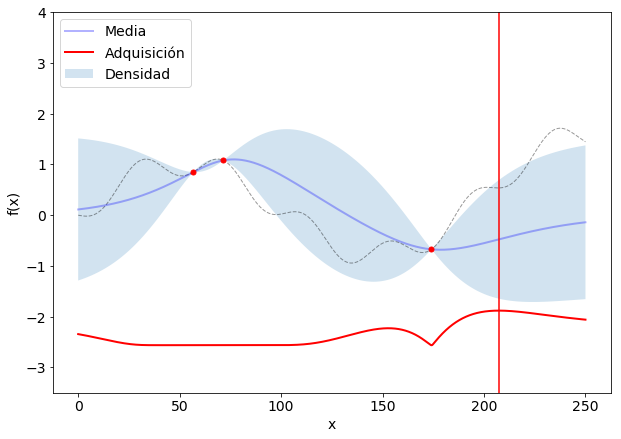

In [137]:
plot_gp(x,y)

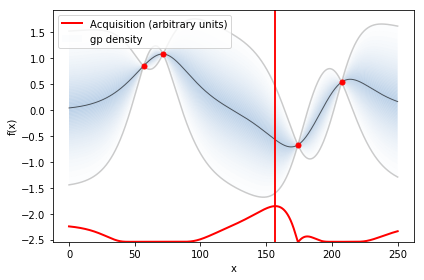

In [138]:
# Creates GPyOpt object with the model and anquisition fucntion
seed(123)
initer=3
myBopt=GPyOpt.methods.BayesianOptimization(f=fpol,            # function to optimize       
                                             domain=bounds1D,         # box-constraints of the problem
                                             initial_design_numdata=initer,
                                             acquisition_type='EI', # exploration/exploitation trade off
                                             normalize_Y=False,
                                             exact_feval = True)    # Selects the Expected improvement
# Run the optimization
max_iter=1     # evaluation budget
myBopt.run_optimization(max_iter)
myBopt.plot_acquisition()

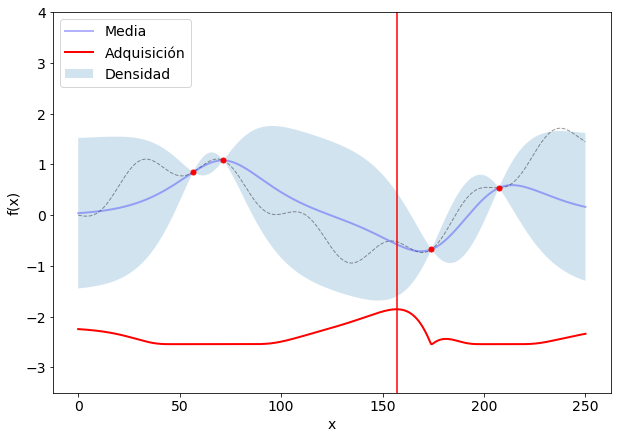

In [140]:
plot_gp(x,y)

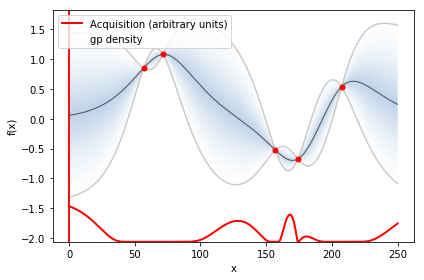

In [141]:
# Creates GPyOpt object with the model and anquisition fucntion
seed(123)
initer=3
myBopt=GPyOpt.methods.BayesianOptimization(f=fpol,            # function to optimize       
                                             domain=bounds1D,         # box-constraints of the problem
                                             initial_design_numdata=initer,
                                             acquisition_type='EI', # exploration/exploitation trade off
                                             normalize_Y=False,
                                             exact_feval = True)    # Selects the Expected improvement
# Run the optimization
max_iter=2     # evaluation budget
myBopt.run_optimization(max_iter)
myBopt.plot_acquisition()

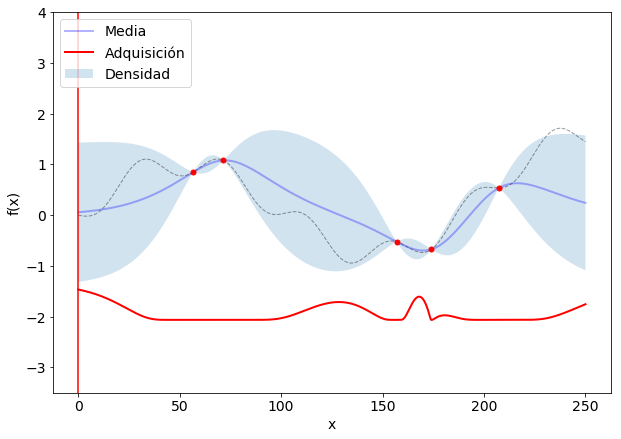

In [142]:
plot_gp(x,y)

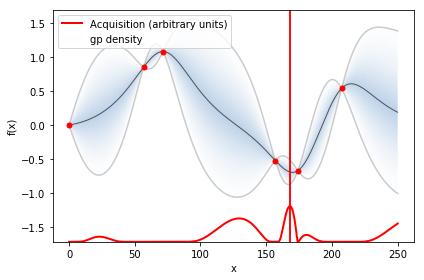

In [143]:
# Creates GPyOpt object with the model and anquisition fucntion
seed(123)
initer=3
myBopt=GPyOpt.methods.BayesianOptimization(f=fpol,            # function to optimize       
                                             domain=bounds1D,         # box-constraints of the problem
                                             initial_design_numdata=initer,
                                             acquisition_type='EI', # exploration/exploitation trade off
                                             normalize_Y=False,
                                             exact_feval = True)    # Selects the Expected improvement
# Run the optimization
max_iter=3     # evaluation budget
myBopt.run_optimization(max_iter)
myBopt.plot_acquisition()

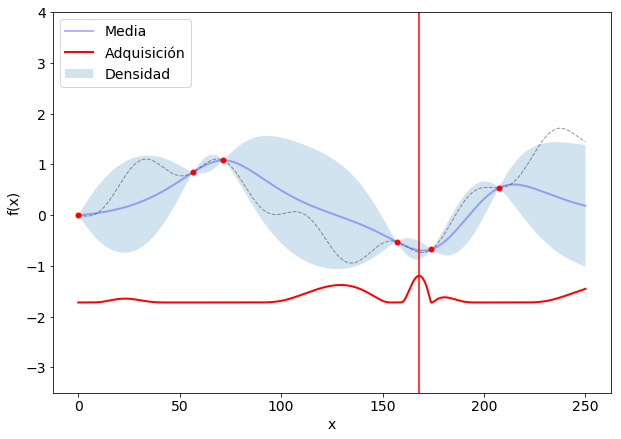

In [144]:
plot_gp(x,y)

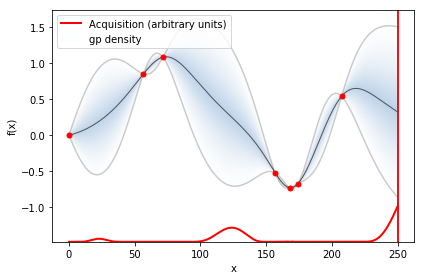

In [145]:
# Creates GPyOpt object with the model and anquisition fucntion
seed(123)
initer=3
myBopt=GPyOpt.methods.BayesianOptimization(f=fpol,            # function to optimize       
                                             domain=bounds1D,         # box-constraints of the problem
                                             initial_design_numdata=initer,
                                             acquisition_type='EI', # exploration/exploitation trade off
                                             normalize_Y=False,
                                             exact_feval = True)    # Selects the Expected improvement
# Run the optimization
max_iter=4     # evaluation budget
myBopt.run_optimization(max_iter)
myBopt.plot_acquisition()

In [146]:
plot_gp(x,y)

KeyboardInterrupt: 

In [ ]:
# Creates GPyOpt object with the model and anquisition fucntion
seed(123)
initer=3
myBopt=GPyOpt.methods.BayesianOptimization(f=fpol,            # function to optimize       
                                             domain=bounds1D,         # box-constraints of the problem
                                             initial_design_numdata=initer,
                                             acquisition_type='EI', # exploration/exploitation trade off
                                             normalize_Y=False,
                                             exact_feval = True)    # Selects the Expected improvement
# Run the optimization
max_iter=5     # evaluation budget
myBopt.run_optimization(max_iter)
myBopt.plot_acquisition()

In [ ]:
plot_gp(x,y)

In [ ]:
# Creates GPyOpt object with the model and anquisition fucntion
seed(123)
initer=3
myBopt=GPyOpt.methods.BayesianOptimization(f=fpol,            # function to optimize       
                                             domain=bounds1D,         # box-constraints of the problem
                                             initial_design_numdata=initer,
                                             acquisition_type='EI', # exploration/exploitation trade off
                                             normalize_Y=False,
                                             exact_feval = True)    # Selects the Expected improvement
# Run the optimization
max_iter=6     # evaluation budget
myBopt.run_optimization(max_iter)
myBopt.plot_acquisition()

In [ ]:
plot_gp(x,y)

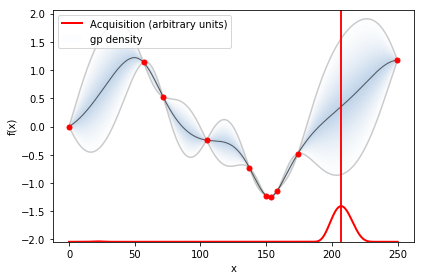

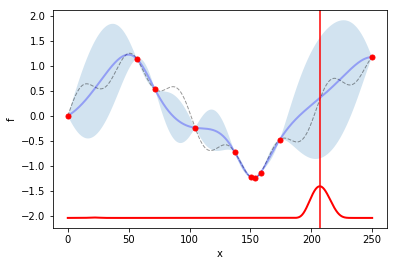

In [38]:
# Creates GPyOpt object with the model and anquisition fucntion
seed(123)
initer=3
myBopt=GPyOpt.methods.BayesianOptimization(f=fpol,            # function to optimize       
                                             domain=bounds1D,         # box-constraints of the problem
                                             initial_design_numdata=initer,
                                             acquisition_type='EI', # exploration/exploitation trade off
                                             normalize_Y=False,
                                             exact_feval = True)    # Selects the Expected improvement
# Run the optimization
max_iter=7     # evaluation budget
myBopt.run_optimization(max_iter)
myBopt.plot_acquisition()
plot_gp()

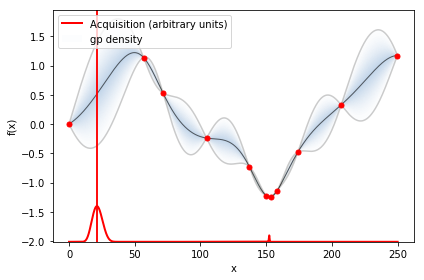

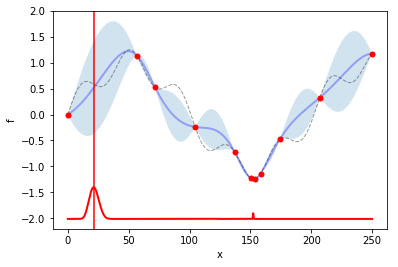

In [39]:
# Creates GPyOpt object with the model and anquisition fucntion
seed(123)
initer=3
myBopt=GPyOpt.methods.BayesianOptimization(f=fpol,            # function to optimize       
                                             domain=bounds1D,         # box-constraints of the problem
                                             initial_design_numdata=initer,
                                             acquisition_type='EI', # exploration/exploitation trade off
                                             normalize_Y=False,
                                             exact_feval = True)    # Selects the Expected improvement
# Run the optimization
max_iter=8     # evaluation budget
myBopt.run_optimization(max_iter)
myBopt.plot_acquisition()
plot_gp()

In [ ]:
# Creates GPyOpt object with the model and anquisition fucntion
seed(123)
initer=3
myBopt=GPyOpt.methods.BayesianOptimization(f=fpol,            # function to optimize       
                                             domain=bounds1D,         # box-constraints of the problem
                                             initial_design_numdata=initer,
                                             acquisition_type='EI', # exploration/exploitation trade off
                                             normalize_Y=False,
                                             exact_feval = True)    # Selects the Expected improvement
# Run the optimization
max_iter=9     # evaluation budget
myBopt.run_optimization(max_iter)
myBopt.plot_acquisition()
plot_gp()